In [844]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
%matplotlib inline

#### Check out the data

In [845]:
# merging two csv files 
# student_data = pd.read_csv('combined_file.csv')
#student_data = pd.concat(map(pd.read_csv, ['student-mat.csv', 'student-por.csv']), ignore_index=True)

# Read the CSV files
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')

# Merge the two dataframes
student_data = pd.concat([df1, df2])

student_data.to_csv("combined.csv", index=False)

##### Understand the data

In [846]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [847]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [848]:
student_data.drop(columns=student_data.columns[0], axis=1,  inplace=True)

In [849]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [850]:
print(student_data.duplicated().sum())
student_data.drop_duplicates()
student_data.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    

In [851]:
#sns.catplot(x="sex", y="studytime", data=student_data, kind="box", aspect=1.5)
#sns.catplot(x="paid", y="G1", data=student_data, kind="box", aspect=1.5)
#plt.show()

<Axes: >

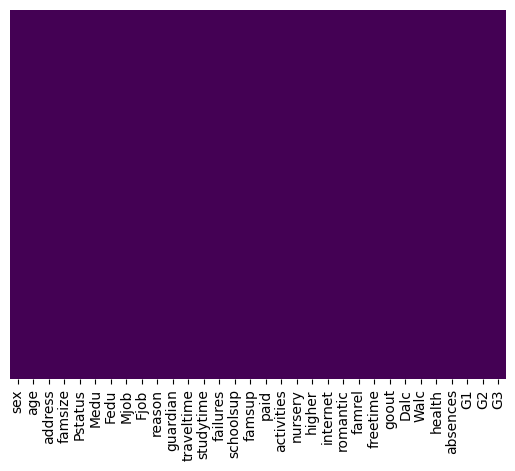

In [852]:
sns.heatmap(student_data.isnull(), yticklabels = False, cbar=False, cmap='viridis')

Não há missing values

### Outliers

In [853]:
student_data.nunique()

sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='age'>

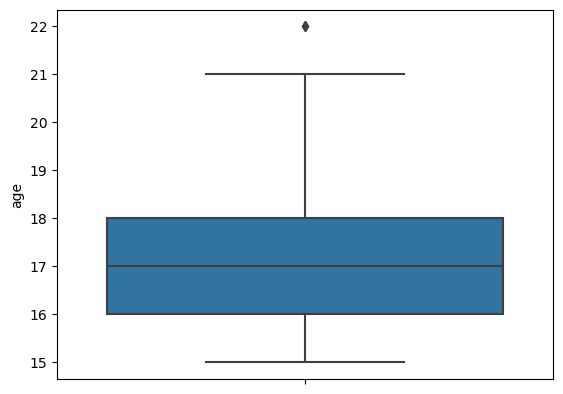

In [882]:
sns.boxplot(y=student_data['age'])

/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='absences'>

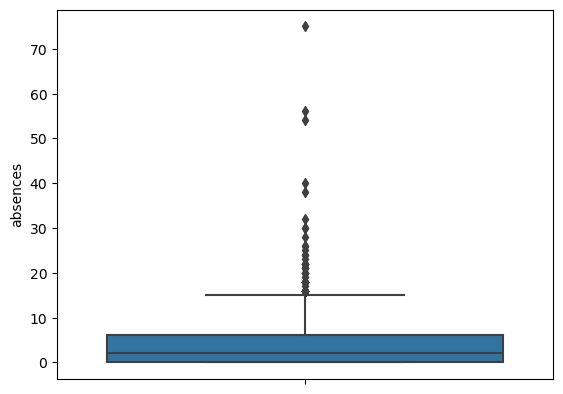

In [855]:
sns.boxplot(y=student_data['absences'])


In [856]:
# remove outliers from 'absences'
student_data = student_data[student_data['absences'] < 45]

#### new columns

In [857]:
'''
new column with the mean of 'walc' and 'dalc'
'''

#student_data['Malc'] = np.ceil(student_data[['Walc', 'Dalc']].mean(axis=1)).astype(int)
#student_data=student_data.drop(['Walc', 'Dalc'] , axis=1) 

# Assuming 'walc' and 'dalc' columns exist in student_data
student_data['Malc'] = (student_data['Dalc'] * 5 + student_data['Walc'] * 2) / 7

# If you want to round up to the nearest integer, you can use np.ceil
student_data['Malc'] = np.ceil(student_data['Malc']).astype(int)



Nova coluna 'media dos testes'

In [858]:
student_data['meanG'] = np.ceil(student_data[['G1', 'G2', 'G3']].mean(axis=1)).astype(int) 


In [859]:
student_data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Malc,meanG
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,1,1,3,6,5,6,6,1,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,3,1,1,3,4,5,5,6,1,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,2,2,3,3,10,7,8,10,3,9
3,F,15,U,GT3,T,4,2,health,services,home,...,2,1,1,5,2,15,14,15,1,15
4,F,16,U,GT3,T,3,3,other,other,home,...,2,1,2,5,4,6,10,10,2,9


### Correlation

In [860]:
df_corr = student_data
column_mapping = {
    'sex': {'F': 0, 'M': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'A': 0, 'T': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1}
}
for column, mapping in column_mapping.items():
    df_corr[column] = df_corr[column].map(mapping)
# Drop columns
df_corr.drop(['address', 'Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)


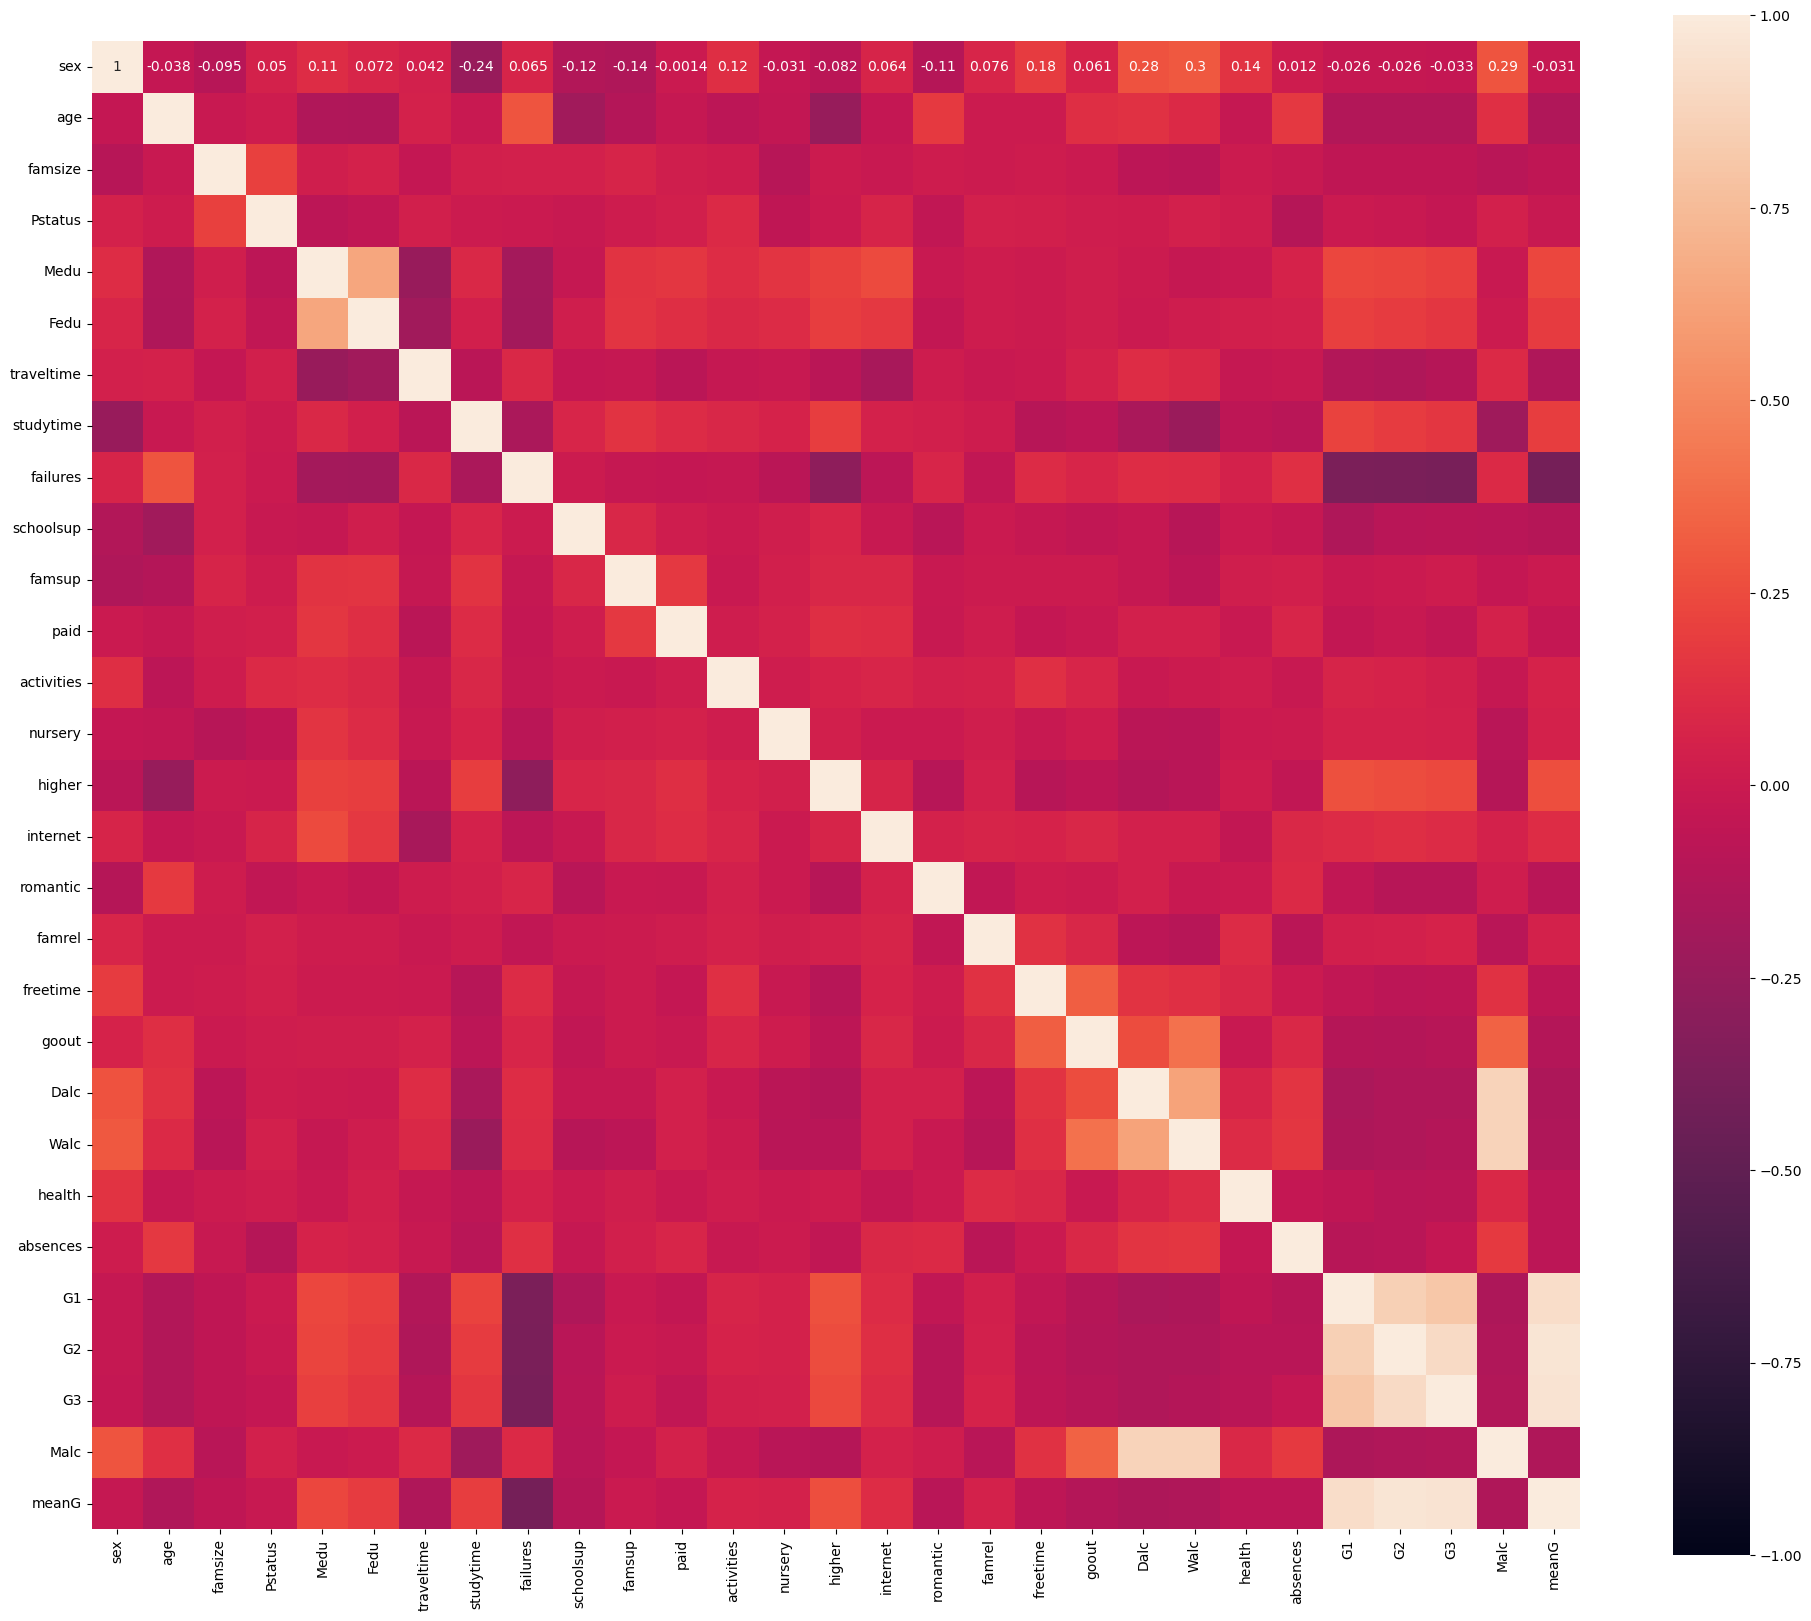

In [861]:
corr_matrix = df_corr.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(24,20))
sns.heatmap(corr_matrix,vmin=-1,vmax=1, square = True, annot = True);

##### Top 10 correlations

In [862]:
top_corr = corr_matrix.unstack()
top_corr = top_corr[top_corr != 1]  
top_10_corr = top_corr['meanG'].nlargest(15)  # Get the top 10 correlations

print(top_10_corr)

G2            0.967118
G3            0.954420
G1            0.923637
higher        0.259118
Medu          0.227633
studytime     0.188553
Fedu          0.187082
internet      0.114905
activities    0.055654
famrel        0.052623
nursery       0.047883
famsup       -0.000777
Pstatus      -0.017463
sex          -0.030547
paid         -0.033548
dtype: float64


In [863]:
top_down_corr = corr_matrix.unstack()
top_down_10_corr = top_corr['meanG'].nsmallest(15)  

print(top_down_10_corr)

failures     -0.399301
Dalc         -0.143539
Malc         -0.138140
Walc         -0.135820
traveltime   -0.133179
age          -0.127939
goout        -0.110789
schoolsup    -0.102479
romantic     -0.090445
health       -0.076494
absences     -0.075405
freetime     -0.066121
famsize      -0.059095
paid         -0.033548
sex          -0.030547
dtype: float64


who have higher grades in the first, second, and third periods are less likely to fail school

In [864]:
X = df_corr.drop(['meanG', 'famsup', 'sex', 'Pstatus','paid','famsize', 'G1', 'G2', 'G3' ], axis=1)
y = df_corr['meanG'] # accuracy de 0.86

In [866]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)


In [659]:
def calculate_and_print_errors(y_test, y_pred):
    # Mean Squared Error (MSE)
    mse = metrics.mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

    # Mean Absolute Error (MAE)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae:.2f}')

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error: {rmse:.2f}')

### Decision Tree

In [683]:
''' decision tree '''
clf = DecisionTreeRegressor(max_depth=3,random_state=2021)

In [684]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=2021)

In [685]:
y_pred = clf.predict(X_test)

In [687]:
calculate_and_print_errors(y_test,y_pred)


Mean Squared Error: 8.23
Mean Absolute Error: 2.28
Root Mean Squared Error: 2.87


### Linear Regression

In [867]:
from sklearn import linear_model

# Create linear regression object 
regr = linear_model.LinearRegression() 
   
# Train the model using the training sets 
regr.fit(X_train, y_train) 
   


LinearRegression()

In [868]:
y_pred = regr.predict(X_test)

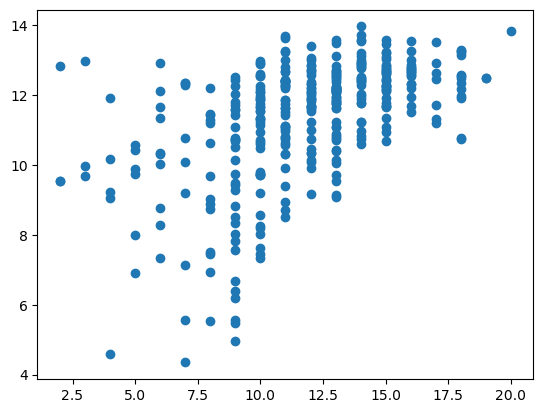

In [869]:
plt.scatter(y_test,y_pred)

In [870]:
calculate_and_print_errors(y_test,y_pred)

Mean Squared Error: 8.17
Mean Absolute Error: 2.23
Root Mean Squared Error: 2.86


In [871]:
# The coefficient of determination: 1 is perfect prediction
print("Intercept: %.2f" % regr.intercept_)

Intercept: 8.90


intercept -> representa o valor da variavel dependente (meanG) quando todas as vars independentes sao zeros

r-squared value -> mede quao bem as variaveis indepedentes explicam a variedade da var depedente. (1 indica a perfect)

In [872]:
#coeff = pd.DataFrame(regr.coef_,df_corr.columns, columns=['Coefficient'] )
#coeff

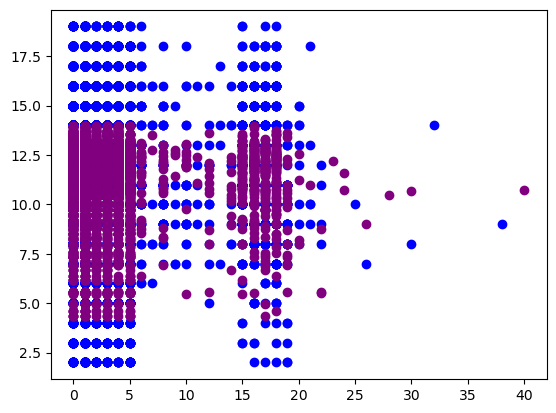

In [873]:
# Plot outputs 
plt.plot(X_train, y_train, color='blue', marker='o', linestyle='None', label='Training Data')

# Plot testing data with a different color
plt.plot(X_test, regr.predict(X_test), color='purple', marker='o', linestyle='None', label='Test Predictions')

# Show the plot
plt.show()

#### with GridSearchCV

In [874]:
from sklearn.model_selection import GridSearchCV

In [875]:
print(clf.get_depth())
print(clf.get_n_leaves())

3
8


In [876]:
param_grid_dt = {
    'fit_intercept': [True, False]
}

'fit_intercept': Indica se o modelo deve ter um termo independente ou não. Os valores [True, False] indicam que o GridSearchCV testará ambas as opções.

In [877]:
grid_search = GridSearchCV(regr, param_grid_dt, scoring='neg_mean_squared_error', cv=5)


In [878]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [879]:
print("Melhores parâmetros: ", grid_search.best_params_)

Melhores parâmetros:  {'fit_intercept': True}


In [881]:
y_pred = grid_search.predict(X_test)
calculate_and_print_errors(y_test, y_pred)

Mean Squared Error: 8.17
Mean Absolute Error: 2.23
Root Mean Squared Error: 2.86


### Random Forest

In [229]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

# Create and fit the RandomForestRegressor
rfr = RandomForestRegressor(max_depth=6)
rfr.fit(X, y)

# Reshape the input for prediction
input_data = np.array([0, 0, 0, 0]).reshape(1, -1)

# Make the prediction
prediction = rfr.predict(input_data)
print(prediction)

[1.09261944]


/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

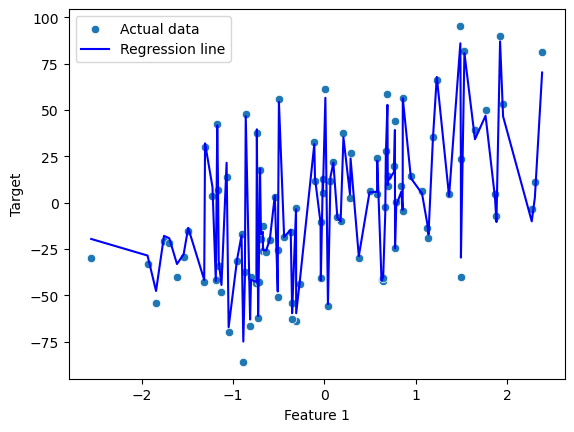

In [230]:
sns.scatterplot(x=X[:, 0], y=y, label='Actual data')
sns.lineplot(x=X[:, 0], y=rfr.predict(X), color='blue', label='Regression line')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()

In [231]:
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have a test set (X_test, y_test)
y_pred = rfr.predict(X)  # Assuming X is your training data

# Calculate Mean Absolute Error
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 2.6242404068112757
R-squared: 0.9909801182569804


### Neural Networks

In [273]:
X = df_corr.drop(['meanG', 'famsup', 'sex', 'Pstatus','paid','famsize', 'G1', 'G2', 'G3' ], axis=1)
y = df_corr['meanG'] # accuracy de 0.86

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable= df_corr.drop(['meanG', 'famsup', 'sex', 'Pstatus','paid','famsize', 'G1', 'G2', 'G3' ], axis=1)
Predictors= df_corr['meanG'] 
 
X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

In [263]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

In [272]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16,input_dim = 5, activation = activation))
    model.add(Dense(8,activation = activation))
    model.add(Dense(1,activation = activation)) # output
    
    #compile 
    model.compile( loss='mae', optimizer=tf.optimizers.Adam(learning_rate), metrics = ['mae', 'mse'])
    return model

In [265]:
model = build_model()
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 8)                 48        
                                                                 
 dense_145 (Dense)           (None, 4)                 36        
                                                                 
 dense_146 (Dense)           (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [266]:
from sklearn.model_selection import KFold

In [267]:

optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer=optimizer)

kf=KFold(n_splits=5, shuffle = True, random_state=2021)

In [268]:
model = KerasRegressor(model = build_model, batch_size=32, validation_split=0.2, epochs=20)



In [269]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)

In [270]:
X_train

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Malc
62,16,1,2,1,2,0,1,1,1,1,1,0,4,4,3,1,1,1,0,1
40,16,2,2,2,2,0,0,1,0,1,1,1,3,3,3,1,2,3,16,2
265,18,3,4,2,2,0,0,1,1,1,1,0,4,2,5,3,4,1,13,4
147,15,1,2,1,2,0,0,0,0,1,1,0,4,3,2,1,1,5,2,1
283,18,1,1,2,2,0,1,1,1,1,1,0,5,4,4,1,1,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,16,3,1,1,4,0,1,0,1,1,1,0,4,3,3,1,2,5,4,2
201,16,2,1,1,2,0,0,1,1,1,1,1,4,2,3,1,2,5,0,2
246,17,4,4,1,2,0,1,1,1,1,1,1,4,5,5,1,3,2,0,2
218,16,2,2,2,4,0,0,1,0,1,1,0,5,3,5,1,1,5,6,1


In [271]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20


ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_49" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_50" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_51" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_52" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_53" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_54" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_55" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_56" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_57" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_58" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_59" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_60" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_61" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_62" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_fileq_xhvyub.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_63" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 20)

